# &#x2B50; Assignment-03, Part-02

<img src="https://avatars0.githubusercontent.com/u/33459977?s=80&v=4" align="left"/>

---------------------------------------------------------------------------
About
=====

- **ARJUN MOHNOT**
- E17CSE102
- EB04
- Mobile: +91-7733993964
- [Website](https://arjun009.github.io)
- [WhatsApp](https://wa.me/917733993964?text=Hey%20Arjun%20Mohnot,%20I%27m%20contacting%20you%20from%20your%20Jupyter%20Notebook,%20A.I.-M.L.)
- [PlayStore](https://play.google.com/store/apps/developer?id=ARJUN+MOHNOT)

---------------------------------------------------------------------------

### Importing Libraries

In [149]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import numpy
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

### Preprocessing of data 

 - Opening csv file
 - filling nan values with mean of the column
 - storing Y (Result) column in list and dropping the Y column from our main dataframe
 - doing hot encoding (using pandas dummy)
 - Merging the dummy dataframe with main dataframe
 - Removing the column in which hot encoding was performed (Here Hour Column)
 - Splitting the dataframe in training and testing dataset (108 rows are for training, last 27 rows are for testing the model.)

In [150]:
openFiles=pd.read_csv("Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv")

In [151]:
x=[i for i in openFiles]
x[0]="Hour"
AVG=openFiles[x[-1]].mean()
openFiles=openFiles.replace(to_replace = np.nan, value =AVG) 
openFiles.columns=x
resultColumn=openFiles[x[-1]]
openFiles=openFiles.drop(x[-1],axis=1)
dummy=pd.get_dummies(openFiles.Hour)
merge=pd.concat([openFiles,dummy],axis=1)
openFiles=merge.drop("Hour",axis=1)
for i in openFiles:
    if openFiles[i].mean()<=0.2:
        openFiles=openFiles.drop(i,axis=1)
minmax = MinMaxScaler()
openFiles[[i for i in openFiles]] = minmax.fit_transform(openFiles[[i for i in openFiles]])
openFiles=pd.concat([openFiles,resultColumn],axis=1)


In [152]:
x = openFiles.iloc[:, :-1].values
y = openFiles.iloc[:, -1].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size  = 4/5,shuffle=False )


# 	&#x2B50; Linear Regression

In [153]:
linearRegressor = LinearRegression()

In [154]:
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
yPrediction = linearRegressor.predict(xTest)

for i in range(27):
     print("○ Predicted Value: ","{0:.4f}".format(yPrediction[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  -0.9508 | Actual Value:  4.0000
○ Predicted Value:  4.4781 | Actual Value:  4.7541
○ Predicted Value:  5.4302 | Actual Value:  5.0000
○ Predicted Value:  4.2250 | Actual Value:  4.0000
○ Predicted Value:  3.8869 | Actual Value:  2.0000
○ Predicted Value:  4.1618 | Actual Value:  4.7541
○ Predicted Value:  5.3955 | Actual Value:  1.0000
○ Predicted Value:  4.7512 | Actual Value:  3.0000
○ Predicted Value:  5.1835 | Actual Value:  9.0000
○ Predicted Value:  4.7880 | Actual Value:  3.0000
○ Predicted Value:  5.0917 | Actual Value:  9.0000
○ Predicted Value:  4.8184 | Actual Value:  3.0000
○ Predicted Value:  4.1397 | Actual Value:  4.7541
○ Predicted Value:  4.3232 | Actual Value:  7.0000
○ Predicted Value:  4.0701 | Actual Value:  3.0000
○ Predicted Value:  4.3271 | Actual Value:  9.0000
○ Predicted Value:  4.7226 | Actual Value:  9.0000
○ Predicted Value:  4.4778 | Actual Value:  4.0000
○ Predicted Value:  4.2354 | Actual Value:  3.0000
○ Predicted Value:  3.6196 | A

### Calculating MSE error 
- Printing predicted , actual value
- Formulae to calculate **MSE**=$\frac{\sum_{i=1}^{n} {(Y_i-Y)^2}}{n}$ (Where Yᵢ is predicted value and Y is actual value, n is total number of testing data)


In [156]:
error=0
for i in range(len(yPrediction)):
    error+=pow(yPrediction[i]-yTest[i],2)
print(error/27)

7.212672281192738


### Plotting the Graph
- Curve trying to fit with the most of the actual value

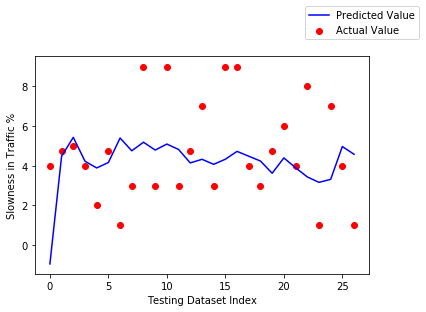

In [157]:
assume=[i for i in range(27)]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, yPrediction, color = 'blue',label="Predicted Value")
plt.ylabel("Slowness in Traffic %")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
plt.show()

# 	&#x2B50; Polynomial Regression


In [158]:
poly=PolynomialFeatures(degree=11)
poly_x=poly.fit_transform(x)

regressor=LinearRegression()
regressor.fit(poly_x,y)
z=regressor.predict(poly.fit_transform(xTest))


for i in range(27):
     print("○ Predicted Value: ","{0:.4f}".format(z[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))


○ Predicted Value:  4.1797 | Actual Value:  4.0000
○ Predicted Value:  4.8359 | Actual Value:  4.7541
○ Predicted Value:  4.6094 | Actual Value:  5.0000
○ Predicted Value:  3.5625 | Actual Value:  4.0000
○ Predicted Value:  2.0469 | Actual Value:  2.0000
○ Predicted Value:  4.2578 | Actual Value:  4.7541
○ Predicted Value:  4.3203 | Actual Value:  1.0000
○ Predicted Value:  2.8281 | Actual Value:  3.0000
○ Predicted Value:  8.8438 | Actual Value:  9.0000
○ Predicted Value:  3.0000 | Actual Value:  3.0000
○ Predicted Value:  8.7969 | Actual Value:  9.0000
○ Predicted Value:  3.1328 | Actual Value:  3.0000
○ Predicted Value:  4.5703 | Actual Value:  4.7541
○ Predicted Value:  7.0078 | Actual Value:  7.0000
○ Predicted Value:  2.4922 | Actual Value:  3.0000
○ Predicted Value:  8.7344 | Actual Value:  9.0000
○ Predicted Value:  7.9062 | Actual Value:  9.0000
○ Predicted Value:  4.4297 | Actual Value:  4.0000
○ Predicted Value:  2.7969 | Actual Value:  3.0000
○ Predicted Value:  5.1641 | Ac

### Calculating MSE error 
- Printing predicted , actual value
- Formulae to calculate **MSE**=$\frac{\sum_{i=1}^{n} {(Y_i-Y)^2}}{n}$ (Where Yᵢ is predicted value and Y is actual value, n is total number of testing data)


In [159]:
error=0
for i in range(len(z)):
    error+=pow(z[i]-yTest[i],2)
print(error/27)

0.5208857393540525


### Plotting the Graph
- Curve trying to fit with the most of the actual value

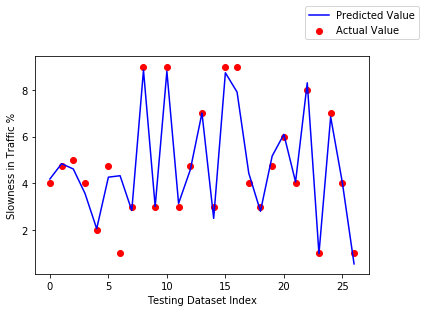

In [160]:
assume=[i for i in range(27)]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, z, color = 'blue',label="Predicted Value")
plt.ylabel("Slowness in Traffic %")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
plt.show()

# 	&#x2B50; Descision Tree

In [161]:
regressor = DecisionTreeRegressor(random_state =1)
regressor.fit(xTrain, yTrain)

# Predicting a new result
y_pred = regressor.predict(xTest)

for i in range(27):
     print("○ Predicted Value: ","{0:.4f}".format(y_pred[i]),"| Actual Value: ","{0:.4f}".format(yTest[i]))

○ Predicted Value:  4.0000 | Actual Value:  4.0000
○ Predicted Value:  4.7541 | Actual Value:  4.7541
○ Predicted Value:  3.0000 | Actual Value:  5.0000
○ Predicted Value:  4.2514 | Actual Value:  4.0000
○ Predicted Value:  4.0000 | Actual Value:  2.0000
○ Predicted Value:  3.0000 | Actual Value:  4.7541
○ Predicted Value:  8.0000 | Actual Value:  1.0000
○ Predicted Value:  1.0000 | Actual Value:  3.0000
○ Predicted Value:  8.0000 | Actual Value:  9.0000
○ Predicted Value:  8.0000 | Actual Value:  3.0000
○ Predicted Value:  8.0000 | Actual Value:  9.0000
○ Predicted Value:  9.0000 | Actual Value:  3.0000
○ Predicted Value:  1.0000 | Actual Value:  4.7541
○ Predicted Value:  5.0000 | Actual Value:  7.0000
○ Predicted Value:  3.0000 | Actual Value:  3.0000
○ Predicted Value:  9.0000 | Actual Value:  9.0000
○ Predicted Value:  7.0000 | Actual Value:  9.0000
○ Predicted Value:  5.0000 | Actual Value:  4.0000
○ Predicted Value:  2.5847 | Actual Value:  3.0000
○ Predicted Value:  4.0000 | Ac

### Calculating MSE error 
- Printing predicted , actual value
- Formulae to calculate **MSE**=$\frac{\sum_{i=1}^{n} {(Y_i-Y)^2}}{n}$ (Where Yᵢ is predicted value and Y is actual value, n is total number of testing data)


In [162]:
error=0
for i in range(len(y_pred)):
    error+=pow(y_pred[i]-yTest[i],2)
print(error/27)

9.73979405067225


### Plotting the Graph
- Curve trying to fit with the most of the actual value

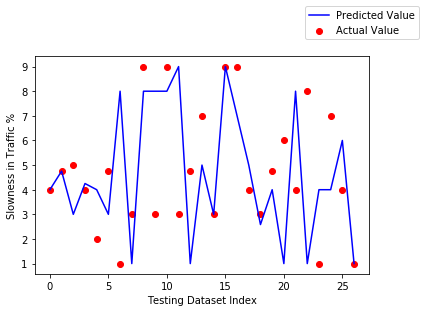

In [163]:
assume=[i for i in range(27)]
plt.scatter(assume,yTest,c='r',label="Actual Value")
plt.plot(assume, y_pred, color = 'blue',label="Predicted Value")
plt.ylabel("Slowness in Traffic %")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
plt.show()